# Inheritance (Kalıtım)

## Kalıtım - Neden ve Nasıl?
Kalıtımdan bahsetmeye başlamadan önce, Python'ın sınıfları ve nesneleri tarafından kullanılan kullanışlı bir mekanizmayı tanıtmak istiyoruz - nesnenin kendisini tanıtma yöntemi.

Aşağıdaki örneği inceleyelim:

In [ ]:
class Star:
    def __init__(self, name, galaxy):
        self.name = name
        self.galaxy = galaxy

sun = Star("Sun", "Milky Way")
print(sun)

Bu program, bizim durumumuzda şu satırı yazdırır:

```
<__main__.Star object at 0x7f1074cc7c50>
```

Aynı kodu kendi bilgisayarınızda çalıştırırsanız, benzer bir çıktı göreceksiniz, ancak onaltılık sayı (0x ile başlayan kısım) farklı olacaktır. Bu sayı, Python tarafından kullanılan dahili bir nesne tanımlayıcısıdır ve kod farklı bir ortamda çalıştırıldığında aynı görünmesi olası değildir.

Gördüğünüz gibi, bu çıktı pek faydalı değil. Daha spesifik veya sadece daha hoş bir çıktı tercih edilebilir.

Neyse ki, Python tam da bu amaç için bir işlev sunar.

Python, herhangi bir sınıf/nesneyi bir dize olarak sunması gerektiğinde (print() fonksiyonunun bir argüman olarak bir nesne alması bu duruma örnektir), nesneden str() adlı bir metodu çağırmaya ve döndürdüğü diziyi kullanmaya çalışır.

Varsayılan str() metodu, önceki dizeyi döndürür - çirkin ve pek bilgilendirici olmayan bir çıktı verir. Bu durumu, aynı isimde kendi metodunuzu tanımlayarak değiştirebilirsiniz.

Bunu yeni yaptık - aşağıdaki koda bakın.

In [ ]:
class Star:
    def __init__(self, name, galaxy):
        self.name = name
        self.galaxy = galaxy

    def __str__(self):
        return self.name + ' in ' + self.galaxy


sun = Star("Sun", "Milky Way")
print(sun)

Bu yeni str() metodu, yıldızın ve galaksinin isimlerinden oluşan bir dize oluşturur - çok özel bir şey değil, ama yazdırma sonuçları şimdi daha iyi görünüyor, değil mi?

Çıktıyı tahmin edebilir misiniz? Doğru olup olmadığını kontrol etmek için kodu çalıştırın.

Kalıtım terimi, bilgisayar programlamasından daha eskidir ve genellikle bir kişinin ölümünden sonra malların bir kişiden diğerine devredilmesi uygulamasını ifade eder. Ancak, bilgisayar programlamada kalıtım tamamen farklı bir anlam taşır.

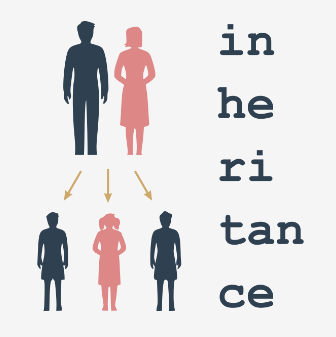

### Kalıtım Kavramı

Kendi amaçlarımız için terimi şöyle tanımlayalım:

**Kalıtım**, nesne yönelimli programlamada yaygın bir uygulamadır ve bu uygulama, var olan bir sınıftan (süper sınıf olarak adlandırılan) yeni oluşturulan bir sınıfa (alt sınıf olarak adlandırılan) özelliklerin ve metodların aktarılmasını içerir.

Başka bir deyişle, kalıtım yeni bir sınıfı sıfırdan oluşturmak yerine, önceden tanımlanmış özellikler setini kullanarak inşa etmeye olanak tanır. Yeni sınıf, mevcut tüm özellikleri devralır ve gerektiğinde yeni özellikler ekleyebilir.

Bu sayede, önceden tanımlanmış genel kurallar ve davranışlar setlerini kullanarak daha özel (daha somut) sınıflar oluşturmak mümkündür.

### Süper Sınıf ve Alt Sınıflar Arasındaki İlişki

Kalıtım sürecindeki en önemli faktör, süper sınıf ile alt sınıfları arasındaki ilişkidir. Not: Eğer B, A'nın alt sınıfı ise ve C, B'nin alt sınıfı ise, bu aynı zamanda C'nin A'nın alt sınıfı olduğu anlamına gelir çünkü bu ilişki tamamen geçişlidir.

İki seviyeli kalıtımın basit bir örneği burada sunulmuştur:

```python
class Vehicle:
    pass

class LandVehicle(Vehicle):
    pass

class TrackedVehicle(LandVehicle):
    pass
```

Gösterilen tüm sınıflar şu anda boştur. Süper sınıf ve alt sınıflar arasındaki ilişkilerin nasıl çalıştığını göstermek için onları yakında dolduracağız.

Şunu söyleyebiliriz:
- `Vehicle` sınıfı, hem `LandVehicle` hem de `TrackedVehicle` sınıflarının süper sınıfıdır.
- `LandVehicle` sınıfı, `Vehicle` sınıfının alt sınıfı ve aynı zamanda `TrackedVehicle` sınıfının süper sınıfıdır.
- `TrackedVehicle` sınıfı, hem `Vehicle` hem de `LandVehicle` sınıflarının alt sınıfıdır.

Bunu kodu okuyarak anlıyoruz (başka bir deyişle, bunu biliyoruz çünkü görebiliyoruz).

Peki Python da aynı şeyi biliyor mu? Python'a bunu sormak mümkün mü? Evet, mümkün.

## Kalıtım: `issubclass()`

Python, iki sınıf arasındaki ilişkiyi belirleyebilen bir işlev sunar. Bu işlevin mantığı karmaşık olmasa da, belirli bir sınıfın başka bir sınıfın alt sınıfı olup olmadığını etkili bir şekilde kontrol eder.

Sözdizimi şöyledir:

```python
issubclass(ClassOne, ClassTwo)
```

Bu işlev, `ClassOne` sınıfı `ClassTwo` sınıfının bir alt sınıfı ise `True`, aksi takdirde `False` döner.

Bunu çalışırken görelim. Editördeki koda bakın ve dikkatlice okuyun.

İki iç içe döngü var. Bu döngülerin amacı, tüm olası sıralı sınıf çiftlerini kontrol etmek ve her çiftin alt sınıf-süper sınıf ilişkisini karşılayıp karşılamadığını belirlemek için sonuçları yazdırmaktır.

Kodu çalıştırın. Program aşağıdaki çıktıyı üretir:

In [ ]:
class Vehicle:
    pass

class LandVehicle(Vehicle):
    pass

class TrackedVehicle(LandVehicle):
    pass

for cls1 in [Vehicle, LandVehicle, TrackedVehicle]:
    for cls2 in [Vehicle, LandVehicle, TrackedVehicle]:
        print(issubclass(cls1, cls2), end="\t")
    print()


Çıktı:
```
True	False	False	
True	True	False	
True	True	True	
```

Sonucu daha okunabilir hale getirelim:

| aşağıdaki sınıfın alt sınıfıdır | Vehicle | LandVehicle | TrackedVehicle |
|--------------------------------------|---------|-------------|----------------|
| **Vehicle**                          | True    | False       | False          |
| **LandVehicle**                      | True    | True        | False          |
| **TrackedVehicle**                   | True    | True        | True           |

Önemli bir gözlem: Her sınıfın, kendisinin bir alt sınıfı olarak kabul edildiğidir.

## Kalıtım: `is` Operatörü

Python'da nesnelerle çalışırken özellikle kullanışlı olan bir operatör vardır:

```python
object_one is object_two
```

`is` operatörü, iki değişkenin (`object_one` ve `object_two`) aynı nesneye atıfta bulunup bulunmadığını kontrol eder.

Unutmayın ki değişkenler nesnelerin kendilerini değil, yalnızca içsel Python belleğine işaret eden referansları depolar.

Bir nesne değişkeninin değerini başka bir değişkene atamak, nesneyi kopyalamaz, yalnızca referansını kopyalar. Bu nedenle, `is` operatörü belirli durumlarda çok yararlı olabilir.

Aşağıdaki koda bir göz atın:

In [ ]:
class SampleClass:
    def __init__(self, val):
        self.val = val

object_1 = SampleClass(0)
object_2 = SampleClass(2)
object_3 = object_1
object_3.val += 1

print(object_1 is object_2)
print(object_2 is object_3)
print(object_3 is object_1)
print(object_1.val, object_2.val, object_3.val)

string_1 = "Mary had a little "
string_2 = "Mary had a little lamb"
string_1 += "lamb"

print(string_1 == string_2, string_1 is string_2)

Çıktı:
```
False
False
True
1 2 1
True False
```

Açıklama:
- Kod, bir özellik oluşturan bir yapıcıya sahip basit bir sınıf tanımlar. Bu sınıftan iki nesne örneği oluşturulur. Nesnelerden biri başka bir değişkene atanır ve `val` özelliği bir artırılır.
- `is` operatörü, tüm olası nesne çiftlerini kontrol etmek için üç kez kullanılır ve `val` özellik değerleri yazdırılır.
- Kodun son kısmında başka bir deney yapılır. Bazı atamalardan sonra her iki dize de aynı metni içerir, ancak bu metinler farklı nesnelerde saklanır.

Sonuçlar, `object_1` ve `object_3`'ün aslında aynı nesne olduğunu, ancak `string_1` ve `string_2`'nin aynı içeriğe sahip olmalarına rağmen aynı olmadığını gösterir.

## Python Özellikleri ve Metotları Nasıl Bulur

Python'un metotları miras alma konusunu nasıl ele aldığını inceleyelim.

Aşağıdaki örneği göz önünde bulundurun:

In [ ]:
class Super:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "Benim adım " + self.name + "."

class Sub(Super):
    def __init__(self, name):
        Super.__init__(self, name)

obj = Sub("Andy")
print(obj)


Kodda olanlar:
- `Super` adında bir sınıf var ve bu sınıf, nesnenin `name` adlı özelliğini atamak için kullanılan kendi yapıcı metodunu tanımlar.
- Sınıf ayrıca, kimliğini açık bir metin biçiminde sunabilen `__str__()` metodunu da tanımlar.
- `Super` sınıfı, `Sub` adında bir alt sınıf oluşturmak için temel olarak kullanılır. `Sub` sınıfı, süper sınıfın yapıcı metodunu çağıran kendi yapıcı metodunu tanımlar. Nasıl yapıldığını fark edin: `Super.__init__(self, name)`.
- Süper sınıfı açıkça adlandırdık ve gerekli tüm argümanları sağlayarak `__init__()` metodunu çağırdık.
- `Sub` sınıfından bir nesne oluşturup yazdırdık.

Kodun çıktısı:
```
Benim adım Andy.
```

Not: `Sub` sınıfında bir `__str__()` metodu olmadığı için, yazdırılan metin `Super` sınıfı tarafından üretilir. Bu, `__str__()` metodunun `Sub` sınıfı tarafından miras alındığı anlamına gelir.

## `super()` Kullanarak Süper Sınıf Metotlarına Erişmek

Aşağıdaki koda bakın. Süper sınıf içinde tanımlanan herhangi bir varlığa erişmenin başka bir yöntemini göstermek için kodu değiştirdik.

In [ ]:
class Super:
    def __init__(self, name):
        self.name = name

    def __str__(self):
        return "Benim adım " + self.name + "."

class Sub(Super):
    def __init__(self, name):
        super().__init__(name)

obj = Sub("Andy")
print(obj)

Önceki örnekte, süper sınıfı açıkça adlandırmıştık. Bu örnekte ise, süper sınıfa ismini belirtmeden erişen `super()` fonksiyonunu kullanıyoruz:

```python
super().__init__(name)
```

`super()` fonksiyonu, çağrılan metoda `self` argümanını iletmenize gerek olmayan (hatta iletmemeniz gereken) bir bağlam oluşturur. Bu nedenle, süper sınıf yapıcısını sadece bir argümanla etkinleştirmek mümkündür.

Not: Bu mekanizmayı sadece süper sınıf yapıcısını çağırmak için değil, aynı zamanda süper sınıf içinde mevcut olan herhangi bir kaynağa erişmek için de kullanabilirsiniz.

## Özellikleri Test Etme: Sınıf Değişkenleri

Benzer bir şeyi, ancak bu sefer özelliklerle (daha doğrusu: sınıf değişkenleriyle) deneyelim.

Aşağıdaki örneğe bir göz atın:

In [ ]:
# Özellikleri test etme: sınıf değişkenleri.
class Super:
    supVar = 1

class Sub(Super):
    subVar = 2

obj = Sub()

print(obj.subVar)
print(obj.supVar)

Bu örnekte, `Super` sınıfı `supVar` adında bir sınıf değişkeni tanımlar ve `Sub` sınıfı `subVar` adında bir sınıf değişkeni tanımlar.

Her iki değişken de `Sub` sınıfının bir nesnesi içinde erişilebilirdir, bu nedenle kodun çıktısı şöyledir:

```
2
1
```

Aynı etki, örnek değişkenlerinde de gözlemlenebilir - aşağıdaki ikinci örneğe bakın.

In [ ]:
# Özellikleri test etme: örnek değişkenleri.
class Super:
    def __init__(self):
        self.supVar = 11

class Sub(Super):
    def __init__(self):
        super().__init__()
        self.subVar = 12

obj = Sub()

print(obj.subVar)
print(obj.supVar)

`Sub` sınıfı yapıcısı `subVar` adında bir örnek değişkeni oluşturur, `Super` yapıcısı ise aynı şeyi `supVar` adında bir değişken ile yapar. Önceki örnekte olduğu gibi, her iki değişken de `Sub` sınıfının bir nesnesi içinde erişilebilirdir.

Programın çıktısı:
```
12
11
```

Not: `supVar` değişkeninin varlığı, `Super` sınıfı yapıcısının çağrılmasına bağlıdır. Onu atlamak, oluşturulan nesnede değişkenin bulunmamasıyla sonuçlanır (kendiniz deneyin).

Artık Python'un davranışını açıklayan genel bir ifade formüle edebiliriz:

Bir nesnenin herhangi bir varlığına erişmeye çalıştığınızda, Python şu sırayla deneyecektir:

1. Onu nesnenin içinde bulmak.
2. Onu nesnenin kalıtım hiyerarşisindeki tüm sınıflarda alttan üste doğru bulmak.
3. Yukarıdaki ikisi de başarısız olursa, bir `AttributeError` istisnası yükseltilir.

İlk koşul biraz daha dikkat gerektirebilir. Bildiğiniz gibi, belirli bir sınıftan türeyen tüm nesneler farklı özellik setlerine sahip olabilir ve bazı özellikler, nesne oluşturulduktan çok sonra eklenebilir.

Aşağıdaki örnek, üç seviyeli bir kalıtım hiyerarşisi ile bunu özetlemektedir. Dikkatle inceleyin.

In [ ]:
class Level1:
    variable_1 = 100
    def __init__(self):
        self.var_1 = 101

    def fun_1(self):
        return 102

class Level2(Level1):
    variable_2 = 200
    def __init__(self):
        super().__init__()
        self.var_2 = 201
    
    def fun_2(self):
        return 202

class Level3(Level2):
    variable_3 = 300
    def __init__(self):
        super().__init__()
        self.var_3 = 301

    def fun_3(self):
        return 302

obj = Level3()

print(obj.variable_1, obj.var_1, obj.fun_1())
print(obj.variable_2, obj.var_2, obj.fun_2())
print(obj.variable_3, obj.var_3, obj.fun_3())


Yaptığımız tüm yorumlar, bir alt sınıfın tam olarak bir üst sınıfa sahip olduğu tekli kalıtımla ilgilidir. Bu, en yaygın durumdur (ve aynı zamanda önerilen durumdur).

Ancak, Python burada çok daha fazlasını sunar. Bir sonraki derslerde, size çoklu kalıtım örneklerini göstereceğiz.

## Çoklu Kalıtım

Bir sınıfın birden fazla üst sınıfa sahip olduğu duruma çoklu kalıtım denir. Söz diziminde, bu tür bir kalıtım, yeni sınıf adından sonra parantez içinde virgülle ayrılmış üst sınıflar listesi olarak gösterilir. İşte şöyle:

In [ ]:
class SuperA:
    var_a = 10
    def fun_a(self):
        return 11

class SuperB:
    var_b = 20
    def fun_b(self):
        return 21

class Sub(SuperA, SuperB):
    pass

obj = Sub()

print(obj.var_a, obj.fun_a())
print(obj.var_b, obj.fun_b())

`Sub` sınıfı, `SuperA` ve `SuperB` adında iki üst sınıfa sahiptir. Bu, `Sub` sınıfının hem `SuperA` hem de `SuperB` tarafından sunulan tüm özellikleri ve metodları miras aldığı anlamına gelir.

Kod şu çıktıyı verir:
```
10 11
20 21
```

Şimdi yeni bir terimi tanıtmanın zamanı geldi - geçersiz kılma (overriding).

Üst sınıflardan birden fazlası aynı ada sahip bir varlık tanımlarsa ne olacağını düşünüyorsunuz?

Aşağıdaki örneği inceleyelim:

In [ ]:
class Level1:
    var = 100
    def fun(self):
        return 101

class Level2(Level1):
    var = 200
    def fun(self):
        return 201

class Level3(Level2):
    pass

obj = Level3()

print(obj.var, obj.fun())

Hem `Level1` hem de `Level2` sınıfları `fun()` adlı bir metot ve `var` adlı bir özellik tanımlar. Bu, `Level3` sınıfı nesnesinin her varlığın iki kopyasına erişebileceği anlamına mı gelir? Kesinlikle hayır.

Kalıtım zincirinde daha sonra tanımlanan varlık, daha önce tanımlanan aynı varlığı geçersiz kılar. Bu nedenle, kod şu çıktıyı verir:

```
200 201
```

Görüldüğü gibi, `Level2` sınıfındaki `var` sınıf değişkeni ve `fun()` metodu, `Level1` sınıfından türetilen aynı adlı varlıkları geçersiz kılar.

Bu özellik, herhangi bir sınıfın atalarından farklı bir şekilde davranması gerektiğinde varsayılan (veya daha önce tanımlanmış) sınıf davranışlarını değiştirmek için kasıtlı olarak kullanılabilir.

Ayrıca Python'un bir varlığı, kalıtım hiyerarşisinin altından yukarıya doğru aradığını ve istenen ada sahip ilk varlıkla tatmin olduğunu söyleyebiliriz.

Peki, bir sınıfın aynı varlığı sunan iki atası olduğunda ve bu atalar aynı seviyedeyken ne olur? Başka bir deyişle, bir sınıf çoklu kalıtım kullanıyorsa ne beklemelisiniz? Şimdi bunu inceleyelim.

Aşağıdaki örneğe bir göz atalım:

In [ ]:
class Left:
    var = "L"
    var_left = "LL"
    def fun(self):
        return "Left"

class Right:
    var = "R"
    var_right = "RR"
    def fun(self):
        return "Right"

class Sub(Left, Right):
    pass

obj = Sub()

print(obj.var, obj.var_left, obj.var_right, obj.fun())


`Sub` sınıfı, `Left` ve `Right` olmak üzere iki üst sınıftan özellikler miras alır (bu isimler kasıtlı olarak anlamlıdır).

`var_right` sınıf değişkeninin `Right` sınıfından, `var_left` değişkeninin ise `Left` sınıfından geldiği açıktır.

Peki, `var` nereden geliyor? Tahmin edebilir miyiz? Aynı soru `fun()` metodu için de geçerlidir - `Left` mı yoksa `Right` mı çağrılacak? Programı çalıştıralım - çıktısı şu şekildedir:

```
L LL RR Left
```

Bu, her iki belirsiz durumda da çözümün `Left` sınıfında olduğunu gösterir. Bu, genel bir kural formüle etmek için yeterli midir? Evet, öyledir.

Python'un nesne bileşenlerini şu sırayla aradığını söyleyebiliriz:

1. Nesnenin içinde.
2. Alt sınıftan üst sınıfa doğru tüm üst sınıflarında.
3. Belirli bir kalıtım yolunda birden fazla sınıf varsa, Python bunları soldan sağa doğru tarar.

Daha fazla kanıt mı gerekiyor? Kodda küçük bir değişiklik yapın - `class Sub(Left, Right):` yerine `class Sub(Right, Left):` yazın, sonra programı tekrar çalıştırın ve ne olduğunu görün.

Şimdi ne görüyorsunuz? Biz şunu görüyoruz:

```
R LL RR Right
```

Siz de aynı sonucu mu görüyorsunuz, yoksa farklı bir şey mi?

## Sınıf Hiyerarşisi Nasıl Oluşturulur

Sınıf hiyerarşisi oluşturmak, sadece düzen için yapılmaz.

Bir problemi sınıflara böldüğünüzde ve bunların hiyerarşideki konumlarını belirlediğinizde, sorunu dikkatlice analiz etmeniz gerekir. Size en iyi uygulamaları göstermeden önce, ilginç bir etkiyi vurgulamak istiyoruz. Bu olağanüstü bir şey değil (genel kuralların bir sonucu), ancak bunu hatırlamak, bazı kodların nasıl çalıştığını ve esnek bir sınıf kümesi oluşturmayı anlamak için anahtardır.

Aşağıdaki kodu inceleyelim:

In [ ]:
class One:
    def do_it(self):
        print("do_it from One")

    def doanything(self):
        self.do_it()

class Two(One):
    def do_it(self):
        print("do_it from Two")

one = One()
two = Two()

one.doanything()
two.doanything()

- `One` ve `Two` adında iki sınıf var, `Two`, `One` sınıfından türetilmiştir.
- `do_it()` metodu iki kez tanımlanmıştır: bir kez `One` sınıfında ve bir kez `Two` sınıfında. Örneğin özü, sadece `One` içinde bir kez çağrılmasıdır.
- Soru şu: Kodun son iki satırıyla hangi metod çağrılacak?

İlk çağrı basittir. `one` adlı nesneden `doanything()` metodunu çağırmak, doğal olarak `One` sınıfındaki metodu etkinleştirir.

İkinci çağrı biraz dikkat gerektirir. Python'un sınıf bileşenlerini nasıl bulduğunu hatırlarsanız, bu da basittir. İkinci çağrı, çağrının `One` sınıfı içinde gerçekleşmesine rağmen `Two` sınıfında bulunan `do_it()` metodunu çalıştırır.

Sonuç olarak, kod şu çıktıyı üretir:

```
do_it from One
do_it from Two
```

Not: Bir alt sınıfın üst sınıf davranışını değiştirebildiği durum (örnekte olduğu gibi) polimorfizm olarak adlandırılır. Bu terim, Yunanca'dan gelir (polys: "çok" ve morphe: "form, şekil"), yani bir sınıfın, alt sınıflarından herhangi biri tarafından yapılan yeniden tanımlamalara bağlı olarak çeşitli formlar alabileceği anlamına gelir.

Üst sınıflarda herhangi bir alt sınıfta yeniden tanımlanarak üst sınıfın davranışını değiştiren metoda sanal metod denir.

Başka bir deyişle, hiçbir sınıfın davranışı kalıcı olarak belirlenmiş değildir. Her sınıfın davranışı, herhangi bir alt sınıfı tarafından herhangi bir zamanda değiştirilebilir.

Polimorfizmi kullanarak sınıf esnekliğini nasıl artırabileceğinizi göstereceğiz.

Aşağıdaki örneği inceleyelim:

In [ ]:
import time

class TrackedVehicle:
    def control_track(self, left, stop):
        pass

    def turn(self, left):
        self.control_track(left, True)
        time.sleep(0.25)
        self.control_track(left, False)

class WheeledVehicle:
    def turn_front_wheels(self, left, on):
        pass

    def turn(self, left):
        self.turn_front_wheels(left, True)
        time.sleep(0.25)
        self.turn_front_wheels(left, False)


Bu size tanıdık geliyor mu? Evet, öyle. Bu, modülün başında nesne yönelimli programlamanın genel kavramlarını tartışırken gösterilen örnekle ilgilidir.

Garip gelebilir, ancak burada hiçbir şekilde kalıtım kullanmadık, sadece bunun her zaman gerekli olmadığını göstermek için ve amacımıza ulaştık.

İki farklı kara aracı türü üretebilen iki ayrı sınıf tanımladık. Aralarındaki ana fark, nasıl döndükleridir. Genel olarak, tekerlekli bir araç ön tekerleklerini döndürerek dönerken, paletli bir araç paletlerinden birini durdurarak döner.

İşte kodun bir açıklaması:
- Paletli bir araç, paletlerinden birini durdurarak ve hareket ettirerek döner (bu, daha sonra uygulanacak olan `control_track()` metodu ile yapılır).
- Tekerlekli bir araç, ön tekerleklerini döndürerek döner (bu, `turn_front_wheels()` metodu ile yapılır).
- `turn()` metodu, her tür araç için uygun olan yöntemi kullanır.

Kodda yanlış olan şeyi görebiliyor musunuz?

`turn()` metodları, bu haliyle bırakılmayacak kadar benzerdir.

Sınıfı yeniden yapılandıralım - sürüş araçlarının tüm benzer yönlerini bir araya getirmek için bir üst sınıf tanıtacağız ve tüm özgül detayları alt sınıflara taşıyacağız.

Aşağıdaki koda tekrar bakın. İşte yaptıklarımız:

In [ ]:
import time

class Vehicle:
    def change_direction(self, left, on):
        pass

    def turn(self, left):
        self.change_direction(left, True)
        time.sleep(0.25)
        self.change_direction(left, False)

class TrackedVehicle(Vehicle):
    def control_track(self, left, stop):
        pass

    def change_direction(self, left, on):
        self.control_track(left, on)

class WheeledVehicle(Vehicle):
    def turn_front_wheels(self, left, on):
        pass

    def change_direction(self, left, on):
        self.turn_front_wheels(left, on)

İşte detaylar:
- `Vehicle` adında bir üst sınıf tanımladık. Bu sınıf, genel bir dönme mekanizmasını uygulamak için `turn()` metodunu kullanır. Asıl dönme işlemi `change_direction()` adlı bir metod ile yapılır. Dikkat edin, `change_direction()` metodu boştur çünkü detayları alt sınıflarda doldurmayı amaçlıyoruz. Bu tür metotlara genellikle soyut metot denir, çünkü yalnızca daha sonra somutlaştırılacak bir olasılığı temsil eder.
- `TrackedVehicle` adında bir alt sınıf tanımladık (`Vehicle` sınıfından türetilmiştir). Bu alt sınıf, `change_direction()` metodunu `control_track()` adlı özel bir metot kullanarak uygular.
- Benzer şekilde, `WheeledVehicle` adlı alt sınıf, `change_direction()` metodunu `turn_front_wheels()` metodu kullanarak uygular.

Bu yaklaşımın ana avantajı (okunabilirlik sorunlarını bir kenara bırakırsak), tamamen yeni bir dönme algoritmasını yalnızca bir yerde, `turn()` metodunu değiştirerek uygulayabilmenizi sağlamasıdır. Bu değişiklik tüm araçlar tarafından takip edilecektir.

Bu şekilde polimorfizm, geliştiricilerin kodu temiz ve tutarlı tutmasına yardımcı olur.

Kalıtım, uyarlanabilir sınıflar oluşturmanın tek yolu değildir. Aynı hedeflere sıkça bir kompozisyon tekniği kullanarak da ulaşabilirsiniz.

Kompozisyon, bir nesneyi farklı diğer nesneler kullanarak oluşturma sürecidir. Bu nesneler, istenen özellikleri (nitelikler ve/veya yöntemler) sağlar ve daha karmaşık bir yapı oluşturmak için bloklar gibi davranır.

Özetle:

- **Kalıtım** bir sınıfın yeteneklerini yeni bileşenler ekleyerek ve mevcut olanları değiştirerek genişletir. Tam işlevsellik sınıfın ve atalarının içinde tanımlanır. Nesne, sınıfın tüm özelliklerini alır ve kullanır.
- **Kompozisyon** bir sınıfı, diğer nesneleri depolayabilen ve kullanabilen bir kap olarak tasarlar (farklı sınıflardan türetilmiş nesneler). Bu nesnelerin her biri, istenen sınıf davranışının bir kısmını uygular.

Daha önce tanımlanan araçları kullanarak farkı gösterelim. Önceki yaklaşım, en üst sınıfın aracı döndürmek için kullanılan genel kuralları bildiği ancak uygun bileşenleri (tekerlekler veya paletler) nasıl kontrol edeceğini bilmediği bir sınıf hiyerarşisi oluşturdu.

Alt sınıflar, bu işlevi özel mekanizmalar tanıtarak sağladı. Şimdi neredeyse aynı şeyi kompozisyon kullanarak yapalım. Sınıf, önceki örnekte olduğu gibi aracın nasıl döneceğini bilir, ancak asıl dönme işlemi `controller` adlı bir özellikte saklanan özel bir nesne tarafından gerçekleştirilir. `Controller`, ilgili araç parçalarını kontrol ederek aracı döndürebilir.

İşte nasıl görünebileceği:

In [ ]:
import time

class Tracks:
    def change_direction(self, left, on):
        print("tracks:", left, on)

class Wheels:
    def change_direction(self, left, on):
        print("wheels:", left, on)

class Vehicle:
    def __init__(self, controller):
        self.controller = controller

    def turn(self, left):
        self.controller.change_direction(left, True)
        time.sleep(0.25)
        self.controller.change_direction(left, False)

wheeled = Vehicle(Wheels())
tracked = Vehicle(Tracks())

wheeled.turn(True)
tracked.turn(False)

`Tracks` ve `Wheels` adında iki sınıf var - bunlar aracın yönünü nasıl kontrol edeceklerini bilir. Ayrıca `Vehicle` adında bir sınıf vardır ve mevcut tüm kontrolörleri (zaten tanımlanan iki veya gelecekte tanımlanacak diğerleri) kullanabilir. Kontrolör, sınıfın başlatılması sırasında sınıfa iletilir.

Bu şekilde, aracın dönme yeteneği `Vehicle` sınıfının içinde uygulanmak yerine, harici bir nesne kullanılarak oluşturulur.

Başka bir deyişle, evrensel bir aracımız var ve üzerine paletler veya tekerlekler takabiliriz.

Kod şu çıktıyı verir:

```
wheels: True True
wheels: True False
tracks: False True
tracks: False False
```

## Tekli Kalıtım vs. Çoklu Kalıtım

Bildiğiniz gibi, Python'da çoklu kalıtım kullanmanın önünde hiçbir engel yoktur. Herhangi bir yeni sınıfı, birden fazla daha önce tanımlanmış sınıftan türetebilirsiniz.

Ancak, bunu yapabilmeniz gerektiği anlamına gelmez. Şunları aklınızda bulundurun:

- **Tekli kalıtım** her zaman daha basit, daha güvenli ve anlaşılması ve bakımı daha kolaydır.
- **Çoklu kalıtım** risk taşır. Hangi üst sınıfların hangi bölümlerinin yeni sınıfı etkileyeceğini belirlerken hata yapma olasılığını artırır.
- **Çoklu kalıtım** metotları geçersiz kılmayı son derece karmaşık hale getirebilir ve `super()` fonksiyonunu kullanmak belirsiz hale gelebilir.
- **Çoklu kalıtım** tek sorumluluk ilkesini (daha fazla ayrıntı [burada](https://en.wikipedia.org/wiki/Single_responsibility_principle)) ihlal eder çünkü birbirlerinden habersiz iki (veya daha fazla) sınıfı birleştirir.

Çoklu kalıtımı mümkün olan en son çözüm olarak düşünmenizi öneririz. Farklı sınıflar tarafından sunulan birçok farklı işlevselliğe gerçekten ihtiyacınız varsa, kompozisyon daha iyi bir alternatif olabilir.

## Yöntem Çözümleme Sırası (MRO) Nedir ve Neden Her Kalıtım Mantıklı Değildir?

Yöntem Çözümleme Sırası (MRO), bir programlama dilinin ihtiyaç duyduğu yöntemi bulmak için bir sınıf hiyerarşisini tarama stratejisidir. Farklı dillerin farklı MRO'lar kullandığını belirtmek önemlidir. Python'un MRO konusunda kendi özel yaklaşımı vardır.

Python'un MRO'sunun nasıl çalıştığını ve çoklu kalıtımı dikkatsizce kullanmanın potansiyel sorunlarını gösteren iki özel durumu inceleyeceğiz. Basit gibi görünen bir snippet ile başlayalım. Aşağıdaki örneğe bir göz atın:

In [ ]:
class Top:
    def m_top(self):
        print("top")

class Middle(Top):
    def m_middle(self):
        print("middle")

class Bottom(Middle):
    def m_bottom(self):
        print("bottom")

obj = Bottom()
obj.m_bottom()
obj.m_middle()
obj.m_top()

Bu kodu çalıştırdığınızda şu tahmin edilebilir çıktı elde edilir:

```
bottom
middle
top
```

Şimdiye kadar sürpriz yok. Şimdi bu koda küçük bir değişiklik yapalım:

In [ ]:
class Top:
    def m_top(self):
        print("top")

class Middle(Top):
    def m_middle(self):
        print("middle")

class Bottom(Middle, Top):
    def m_bottom(self):
        print("bottom")

obj = Bottom()
obj.m_bottom()
obj.m_middle()
obj.m_top()

Buradaki değişikliği fark ettiniz mi?

```python
class Bottom(Middle, Top):
```

Basit bir tekli kalıtım yolunu çoklu kalıtım yapısına dönüştürdük. Bu geçerli mi? Evet, geçerli. Peki, nasıl çalışıyor?

Gördüğünüz gibi, iki üst sınıfın parantez içinde listelenme sırası kodun yapısına uygundur: `Middle` sınıfı, tıpkı gerçek kalıtım yolunda olduğu gibi `Top` sınıfının önündedir. Tuhaflığına rağmen, örnek doğrudur ve beklendiği gibi çalışır, ancak yeni bir işlevsellik veya ek anlam getirmez.

Şimdi kodu tekrar değiştirelim ve `Bottom` sınıfı tanımında üst sınıf adlarını yer değiştirelim:

In [ ]:
class Top:
    def m_top(self):
        print("top")

class Middle(Top):
    def m_middle(self):
        print("middle")

class Bottom(Top, Middle):
    def m_bottom(self):
        print("bottom")

obj = Bottom()
obj.m_bottom()
obj.m_middle()
obj.m_top()

Bu değişiklik kodu bozacak ve artık çalışmayacaktır. Zorladığımız sıra (`Top, Middle`), kodun yapısından türetilen kalıtım yolu ile uyumsuzdur. Python bunu kabul etmez ve şu hatayı görürsünüz:

```
TypeError: Cannot create a consistent method resolution order (MRO) for bases Top, Middle
```

Bu mesaj, Python'un MRO'sunun bükülemeyeceğini veya ihlal edilemeyeceğini açıkça belirtir. Bu sadece Python'un bir kuralı değil, sınıf hiyerarşisinde tutarlılığı korumak için uymanız gereken bir ilkedir.

## Elmas Problemi

Elmas problemi, çoklu kalıtımdan kaynaklanabilecek klasik bir sorundur. Bu isim, kalıtım diyagramının şekliyle ilgilidir – kavrama bir göz atın:

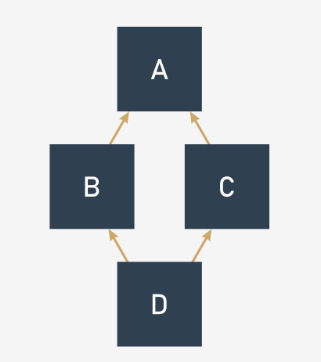

1. En üstte `A` adında bir üst sınıf vardır.
2. `A` sınıfından türetilen iki alt sınıf vardır: `B` ve `C`.
3. `B` ve `C`'den (veya Python'da sırası önemli olduğu için `C` ve `B`'den) türetilen en altta `D` adında bir alt sınıf vardır.

Elmas şekli görebiliyor musunuz?

Bu yapıyı Python koduna çevirelim. Bazı programlama dilleri, Java ve C# gibi, çoklu kalıtıma izin vermezler ve böylece elmas problemini tamamen önlerler.

Ancak Python, çoklu kalıtıma izin verir ve bu tür kodları yazmanıza ve çalıştırmanıza olanak tanır. Ancak her zaman MRO'nun (Yöntem Çözümleme Sırası) kontrol altında olduğunu unutmayın.

Önceki örneğimizi elmas yapısına benzetmek için değiştirelim:

In [ ]:
class Top:
    def m_top(self):
        print("top")

class Middle_Left(Top):
    def m_middle(self):
        print("middle_left")

class Middle_Right(Top):
    def m_middle(self):
        print("middle_right")

class Bottom(Middle_Left, Middle_Right):
    def m_bottom(self):
        print("bottom")

obj = Bottom()
obj.m_bottom()
obj.m_middle()
obj.m_top()

Dikkat edin, `Middle_Left` ve `Middle_Right` sınıfları aynı adı taşıyan bir yöntem tanımlar: `m_middle()`.

Bu durum örneğimizde biraz belirsizlik yaratır. Ana soru şu: Aşağıdaki satır çalıştırıldığında hangi `m_middle()` yöntemi çağrılacaktır?

```python
obj.m_middle()
```

Başka bir deyişle, ekranda ne göreceksiniz: `middle_left` mı yoksa `middle_right` mı?

Dikkatlice düşünün ve Python'un MRO'sunu unutmayın!

Hazır mısınız?

Evet, doğru. Çağrı `Middle_Left` sınıfından `m_middle()` yöntemini etkinleştirecektir. Bunun nedeni, `Middle_Left`'in `Bottom` sınıfının kalıtım listesindeki `Middle_Right`'tan önce listelenmiş olmasıdır. Bunu doğrulamak için listedeki iki sınıfı yer değiştirin ve sonuçları kontrol edin.

Daha fazla keşfetmek isterseniz, `Top` sınıfına başka bir `m_middle()` yöntemi ekleyin ve davranışını gözlemleyin.

Gördüğünüz gibi, elmaslar hem gerçek hayatta hem de Python'da karmaşıklık getirebilir.

## Temel Çıkarımlar

1. `__str__()` adlı yöntem, bir nesnenin içeriğini okunabilir bir dizeye dönüştürür. Nesnenizin kendisini daha şık bir şekilde sunabilmesi için bu yöntemi yeniden tanımlayabilirsiniz. Örneğin:

    ```python
    class Mouse:
        def __init__(self, name):
            self.my_name = name

        def __str__(self):
            return self.my_name

    the_mouse = Mouse('mickey')
    print(the_mouse)  # "mickey" yazdırır.
    ```

2. `issubclass(Class_1, Class_2)` adlı fonksiyon, `Class_1`'in `Class_2`'nin alt sınıfı olup olmadığını belirler. Örneğin:

    ```python
    class Mouse:
        pass

    class LabMouse(Mouse):
        pass

    print(issubclass(Mouse, LabMouse), issubclass(LabMouse, Mouse))  # "False True" yazdırır.
    ```

3. `isinstance(Object, Class)` adlı fonksiyon, bir nesnenin belirtilen sınıftan gelip gelmediğini kontrol eder. Örneğin:

    ```python
    class Mouse:
        pass

    class LabMouse(Mouse):
        pass

    mickey = Mouse()
    print(isinstance(mickey, Mouse), isinstance(mickey, LabMouse))  # "True False" yazdırır.
    ```

4. `is` operatörü, iki değişkenin aynı nesneye atıfta bulunup bulunmadığını kontrol eder. Örneğin:

    ```python
    class Mouse:
        pass

    mickey = Mouse()
    minnie = Mouse()
    cloned_mickey = mickey
    print(mickey is minnie, mickey is cloned_mickey)  # "False True" yazdırır.
    ```

5. Parametresiz `super()` fonksiyonu, sınıfın en yakın üst sınıfına bir referans döndürür. Örneğin:

    ```python
    class Mouse:
        def __str__(self):
            return "Mouse"

    class LabMouse(Mouse):
        def __str__(self):
            return "Laboratory " + super().__str__()

    doctor_mouse = LabMouse()
    print(doctor_mouse)  # "Laboratory Mouse" yazdırır.
    ```

6. Bir üst sınıfta tanımlanan yöntemler, örnek değişkenler ve sınıf değişkenleri, otomatik olarak alt sınıflar tarafından miras alınır. Örneğin:

    ```python
    class Mouse:
        Population = 0

        def __init__(self, name):
            Mouse.Population += 1
            self.name = name

        def __str__(self):
            return "Hi, my name is " + self.name

    class LabMouse(Mouse):
        pass

    professor_mouse = LabMouse("Professor Mouser")
    print(professor_mouse, Mouse.Population)  # "Hi, my name is Professor Mouser 1" yazdırır.
    ```

7. Python, herhangi bir nesne/sınıf özelliğini bulmak için şu sırayla arama yapar:
    - Önce nesnenin içinde.
    - Sonra, alt sınıftan üst sınıfa doğru, nesnenin kalıtım hattına dahil olan tüm sınıflarda.
    - Belirli bir kalıtım yolunda birden fazla sınıf varsa, Python bunları soldan sağa doğru tarar.
    - Yukarıdakilerin hiçbiri özelliği bulamazsa, `AttributeError` istisnası yükseltilir.

8. Alt sınıflardan biri, üst sınıfta var olan bir yöntem/sınıf değişkeni/örnek değişkeni ile aynı ada sahip bir yöntem/değişken tanımlarsa, yeni ad, önceki adın tüm örneklerinin yerini alır. Örneğin:

    ```python
    class Mouse:
        def __init__(self, name):
            self.name = name

        def __str__(self):
            return "My name is " + self.name

    class AncientMouse(Mouse):
        def __str__(self):
            return "Meum nomen est " + self.name

    mus = AncientMouse("Caesar")
    print(mus)  # "Meum nomen est Caesar" yazdırır.
    ```